# Text files in the world of numbers

Say you create a text file:

```
When I wrote the following pages, or rather the bulk of them, I lived
alone, in the woods, a mile from any neighbor, in a house which I had
built myself, on the shore of Walden Pond, in Concord, Massachusetts,
and earned my living by the labor of my hands only. I lived there two
years and two months. At present I am a sojourner in civilized life
again.
```

At their core, computers only understand numbers, so how is the computer storing this text file?

### Mapping characters to numbers

Decades ago, computer programmers built dictionaries which mapped letters to numbers. For example, given the letters `['W', 'h', 'e', 'n']`, the ASCII (American Standard Code for Information Interchange) maps them to:

In [ ]:
list("When")

In [ ]:
[ord(c) for c in list("When")]

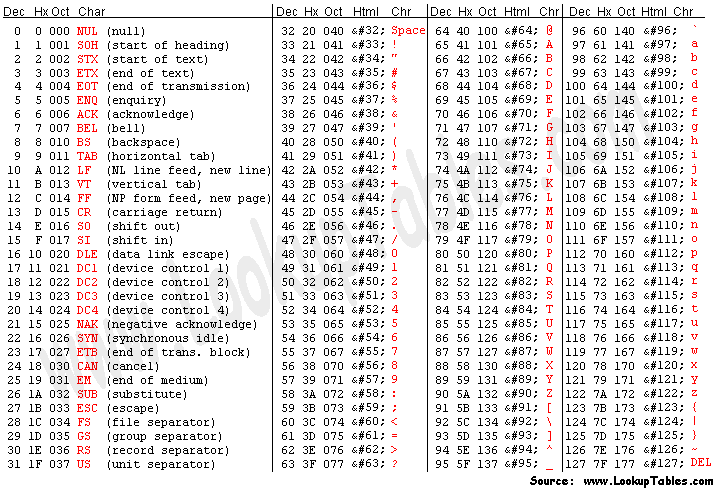

Notice that capital W and small w have different numbers. For many years, computers could ONLY display the characters you see on the screen (or a few additions)

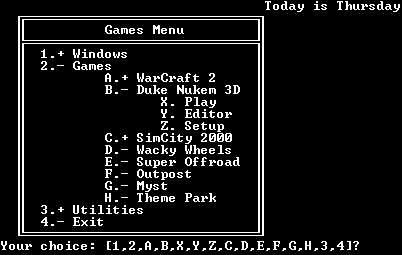
(Image from https://www.ajmmame.webajm.com/how_to_make_dos_menus.htm)

The screenshot above has some fancy lines, which don't show up in the table above. That's because the screen above was drawn using an extended character set (partially shown below):

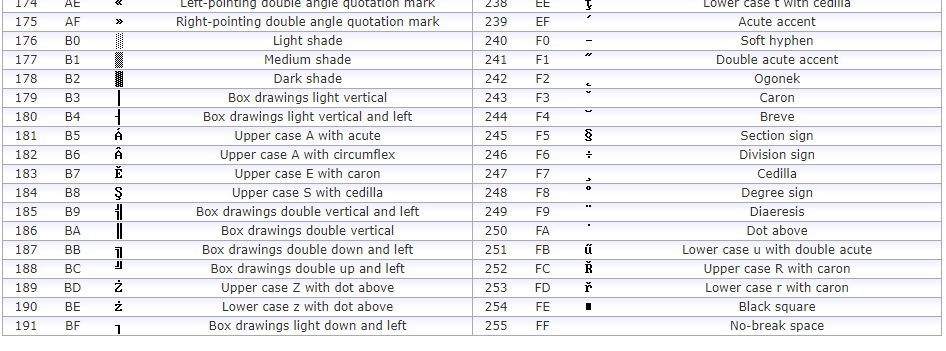

(Image from https://www.ascii-codes.com/cp852.html)

The above screenshot is from the Latin-2 extension, which provides characters for Central European languages, such as Bosnian, Croatian, Czech, Hungarian, Polish, Romanian and Slovak.

I mentioned that this is an *extension*. The base of this table is still the ASCII table we saw earlier. The text from *Walden* we referenced above can be represented in base ASCII, since it is just normal English.

However, what if you were on vacation in Poland, and accidentally typed â instead of a? If you tried to open this file 

In [ ]:
for line in open('howareyou_english.txt', encoding='ascii'): print(line)

In [ ]:
for line in open('howareyou_not_english.txt', encoding='ascii'): print(line)

Yikes, what happened?

In [ ]:
for line in open('howareyou_not_english.txt', encoding='utf8'): print(line)

In [ ]:
for line in open('howareyou_english.txt', encoding='utf8'): print([ord(c) for c in list(line)])

In [ ]:
for line in open('howareyou_not_english.txt', encoding='utf8'): print([ord(c) for c in list(line)])

Notice that the European character maps to the number 226, which doesn't appear in the original ASCII table. No wonder it blew up!

### utf8 saves the day

Luckily, operating systems built around ASCII and incremental extensions is old news. Today we are living in the world of Unicode. UTF8 (8 bit Unicode Transformation Format) can handle vast majority of text found on the internet.

UTF8 is basically a look-up table for over a million characters. It can handle all western languages, as well as Greek, Cyrillic, Hebrew, Arabic and others. What's more, ASCII is a subset of UTF8 so anything written with ASCII will be readable in UTF8. *This is why it is often a good idea to open a file as utf8, if ASCII throws an error*.

# Non-printable characters

You may think of a text file as a two dimensional grid of characters. Words and characters go from left to right and top to bottom (in English). However, as far as the disk is concerned, your text files are just one, incredibly long, line (actual picture is even more complicated)

In [ ]:
for line in open('howareyou_english.txt'): print(line)

In [ ]:
for line in open('howareyou_english_multiple_lines.txt'): print(line)

In [ ]:
print([ord(c) for c in list(open('howareyou_english.txt').read())])

In [ ]:
print([ord(c) for c in list(open('howareyou_english_multiple_lines.txt').read())])

**Exercise** Try to map the numbers above to the words in the earlier cell. What does 32 correspond to?

**Exercise** What does the 10 correspond to?

Programming languages often provide a way to type out special characters, such as tabs and newline characters using an *escape sequence*. For example, a new line can be represented as `'\n'`. Note that `slash n` is considered a single character. Adding the `\` (slash) just means that we are about to represent a non-standard character

### White space issues

In [ ]:
stmt1 = "Hello   world"
stmt2 = "Hello\tworld"
print(stmt1)
print(stmt2)

The two printed statements above look exactly the same. However, as the source code shows, they are not. They are not even the same size:

In [ ]:
print(len(stmt1))
print(len(stmt2))

In [ ]:
print(list(stmt1))
print(list(stmt2))

In [ ]:
print([ord(c) for c in list(stmt1)])
print([ord(c) for c in list(stmt2)])

If you didn't have access to the source code you would be in for hours (perhaps days) of frustration in trying to understand why every programming language in the world thought the two statements were different, even though you can clearly *see* they are not!

Be aware of white space characters which look similar.

In [ ]:
import string
string.whitespace

In [ ]:
string.punctuation

### Windows vs Unix

These days, `\n` is used to represent a new line character everywhere. However, historically, Windows (and DOS) consider the correct 'new line' to be represented by `\r\n` (two charatcters: carriage return and line feed).

# Binary Files

Although most data scientist will never have to directly parse binary files, let's mention them here for good measure.

We have already discussed that text files use a mapping, such as ASCII or Unicode. However, there is nothing in the file which describes itself as a text file.

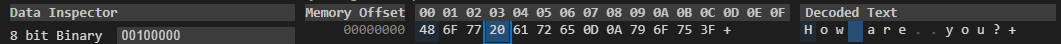

What if this was an image file, instead of a text file? We wouldn't be able to tell just by looking at the file (other than getting gibberish when reading in a text editor). In an image, the numbers may represent pixel colors, instead of text characters. 

For practical purpose, a binary file is one which does not have a defined lookup table which converts numbers to characters (please note that this is a simplification)

In [ ]:
print([ord(c) for c in list("100")])

In [ ]:
print([ord(c) for c in list("100000")])

# Reading and writing text files in Python

As we have seen, we can open text files as simple as:

In [ ]:
open('howareyou_english.txt')

In [ ]:
open('howareyou_english.txt', 'r')

In [ ]:
open('howareyou_english.txt', mode='r')

Note that the *mode* defaults to 'r' (actually it defaults to 'rt'). This means that a file is open in 'read' mode, as a text file. Here is a table from Python docs for `open`:


|Character|Meaning|
|---|---|
|'r'|open for reading(default)|
|'w'|open for writing, truncating the file first|
|'x'|create a new file and open it for writing|
|'a'|open for writing, appending to the end of the file if it exists|
|'b'|binary mode|
|'t'|text mode (default)|
|'+'|open a disk file for updating (reading and writing)|
|'U'|universal newline mode (deprecated)|


Also notice that on Windows (the machine on which I am writing this), the encoding is automatically picked as cp1252. This encoding can open ASCII files correctly, but has trouble with non-western languages. 


The most common modes are:
- 'r' for reading (not writing)
- 'w' for writing
- 't' for text mode

Here is what happens if you try to write to a file, which is opened as 'r':

In [ ]:
in_file = open('howareyou_english.txt')
in_file.write('hello')

### Safely open a file with `with`

Although this isn't likely to be a prblem for short scripts, it is good practice to close a file when you are done reading it. It is considered best practice (in modern Python) to use a `with` clause to automatically close the file when you are done with it:

In [ ]:
with open('howareyou_english.txt') as safe_in_file:
    print(safe_in_file.read())

If you try to 'read' a file which has already been read, the cursor is already at the bottom and you will get an error:

In [ ]:
print(safe_in_file.read())